# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Maulana Ihza Ishlahy
- **Email:** mc006d5y1744@student.devacademy.id
- **ID Dicoding:** MC006D55Y1744

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana distribusi metode pembayaran pada kategori produk dengan jumlah transaksi terbanyak?
- Pertanyaan 2 : Bagaimana kecenderungan penggunaan metode pembayaran berdasarkan kategori produk yang memiliki nilai transaksi terbanyak? Bagaimana perbandingan jumlah transaksi antara kategori produk dengan transaksi tertinggi? Manakah kategori yang memiliki jumlah transaksi terbanyak?

## Import Semua Packages/Library yang Digunakan

Dilakukan import beberapa library python yaitu:
- **pandas** untuk membaca, mengolah, dan menganalisis dataset
- **matplotlib.pyplot** untuk membuat visualisasi dasar seperti grafik, histogram, dll
- **seaborn** untuk membuat grafik yang lebih menarik dan mudah dibaca dibanding matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengimpor File Dataset

In [4]:
payments_df = pd.read_csv("order_payments_dataset.csv")
order_items_df = pd.read_csv("order_items_dataset.csv")
products_df = pd.read_csv("products_dataset.csv")
category_translation_df = pd.read_csv("product_category_name_translation.csv")

Merge dari 4 Dataset yang akan digunakan

In [5]:
df_gabungan = order_items_df.merge(payments_df, on="order_id", how="inner")
df_gabungan = df_gabungan.merge(products_df, on="product_id", how="inner")
df_gabungan = df_gabungan.merge(category_translation_df, on="product_category_name", how="left")

Pengecekan keutuhan data dengan menampilkan 5 data awal dan akhir dari dataset gabungan

In [6]:
print("Data Overview:\n", df_gabungan.head())
print("Data Overview:\n", df_gabungan.tail())

Data Overview:
                            order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-09-19 09:45:35   58.90          13.29                   1   
1  2017-05-03 11:05:13  239.90          19.93                   1   
2  2018-01-18

**Insight:**
- Pada Proses Gathering Data, pertama-tama dilakukan proses impor data agar dapat diproses oleh kdoe program. Setiap dataset ini memuat informasi berbeda:

order_payments_dataset.csv → Data metode pembayaran.

order_items_dataset.csv → Data item dalam pesanan.

products_dataset.csv → Informasi produk.

product_category_name_translation.csv → Data terjemahan nama kategori produk ke Bahasa Inggris.

- Dilanjutkan dengan melakukan 'merge' atau penggabungan dari dataset yang akan digunakan berdasarkan key value masing-masing. Proses ini dilakukan bertahap yang digabung kedalam sebuah variabel dataframe bernama 'df_gabungan'.
- Dilakukan juga penampilan sementara sebanyak 5 baris data dari seluruh kolom di awal dan akhir dataframe gabungan ini.

### Assessing Data

Melihat infromasi dataframe secara keseluruhan menggunakan fungsi bawaan Python

In [7]:
df_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   order_item_id                  117601 non-null  int64  
 2   product_id                     117601 non-null  object 
 3   seller_id                      117601 non-null  object 
 4   shipping_limit_date            117601 non-null  object 
 5   price                          117601 non-null  float64
 6   freight_value                  117601 non-null  float64
 7   payment_sequential             117601 non-null  int64  
 8   payment_type                   117601 non-null  object 
 9   payment_installments           117601 non-null  int64  
 10  payment_value                  117601 non-null  float64
 11  product_category_name          115903 non-null  object 
 12  product_name_lenght           

Mencari jumlah missing data pada dataframe

In [8]:
print("jumlah missing: \n", df_gabungan.isna().sum())

jumlah missing: 
 order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name            1698
product_name_lenght              1698
product_description_lenght       1698
product_photos_qty               1698
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
product_category_name_english    1723
dtype: int64


Mencari jumlah data duplikasi pada dataframe

In [9]:
print("jumlah duplikasi: ", df_gabungan.duplicated().sum())

jumlah duplikasi:  0


**Insight:**
- Digunakan fungsi bawaan python yang menampilkan informasi tentang jumlah data, tipe data, dan jumlah nilai kosong dalam dataframe.
- Dilanjutkan dengan mencari jumlah data yang hilang pada setiap kolom. Disini terlihat beberapa kolom yang memiliki total nilai missing/kosong.
- Dilanjutkan dengan mencari jumlah data yang duplikat/ganda pad setiap kolom. Namun tidak ditemukan adanya data duplikat.

### Cleaning Data

Mengisi nilai missing dari kolom 'product_category_name_english' dengan "Not Defined"

In [10]:
df_gabungan["product_category_name_english"] = df_gabungan["product_category_name_english"].fillna("Not Defined")

Menghapus semua baris dan kolom yang memiliki nilai kosong

In [12]:
df_gabungan_clean = df_gabungan.dropna()

Mengecek apakah masih ada nilai kosong pada dataframe

In [13]:
print("Jumlah nilai kosong setelah cleaning:\n", df_gabungan_clean.isna().sum())

Jumlah nilai kosong setelah cleaning:
 order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64


**Insight:**
- Pada proses cleaning diawali dengan memberikan nilai "Not Defined" pada kolom 'product_category_name_english' dikarenakan kolom ini akan digunakan dalam menjawab pertanyaan bisnis.
- Dilanjutkan dengan menghapus setiap kolom dan baris yang memiliki nilai kosong. Seharusnya nilai-nilai disini bisa dianggap tidak terlalu penting karena bukan parameter merumuskan jawaban pertanyaan.
- Terakhir dilakukan pengecekan apakah masih ada nilai kosong pada dataframe

## Exploratory Data Analysis (EDA)

Melakukan describe() untuk melihat kondisi dari nilai pada dataframe baru yang telah dibersihkan

In [14]:
print(df_gabungan_clean.describe(include="all"))

                                order_id  order_item_id  \
count                             115902  115902.000000   
unique                             97275            NaN   
top     895ab968e7bb0d5659d16cd74cd1650c            NaN   
freq                                  63            NaN   
mean                                 NaN       1.196304   
std                                  NaN       0.699508   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             115902                            115902   
unique                             32340                              3035   
top     aca2eb7d00ea1a7b8ebd4e68314663af  4a3ca9315b744ce

Menentukan beberapa kolom yang perlu digunakan, kemudian dimasukkan ke variabel dataframe baru yang sekaligus dihapuskan kolom kosongnya

In [15]:
kolom_yang_di_keep = ["order_id", "payment_type", "product_category_name_english", "payment_value"]
df_gabungan_kolom_penting = df_gabungan_clean[kolom_yang_di_keep].dropna()

Mengecek dataframe yang telah dipilih/sortir kolom yang diperlukan

In [16]:
print(df_gabungan_kolom_penting.describe(include="all"))

                                order_id payment_type  \
count                             115902       115902   
unique                             97275            4   
top     895ab968e7bb0d5659d16cd74cd1650c  credit_card   
freq                                  63        85535   
mean                                 NaN          NaN   
std                                  NaN          NaN   
min                                  NaN          NaN   
25%                                  NaN          NaN   
50%                                  NaN          NaN   
75%                                  NaN          NaN   
max                                  NaN          NaN   

       product_category_name_english  payment_value  
count                         115902  115902.000000  
unique                            72            NaN  
top                   bed_bath_table            NaN  
freq                           11823            NaN  
mean                             NaN     173.

Melihat distribusi total transaksi berdasarkan metode pembayaran secara keseluruhan

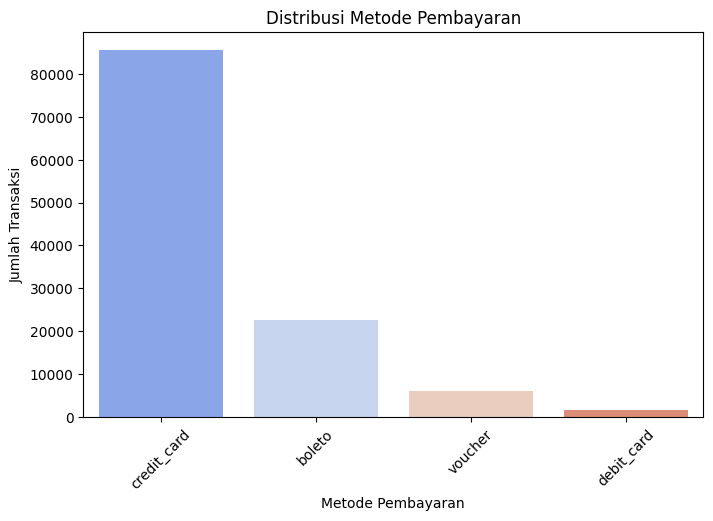

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_gabungan_kolom_penting, x="payment_type", palette="coolwarm", hue="payment_type", order=df_gabungan_kolom_penting["payment_type"].value_counts().index)
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()


Menampilkan Distribusi Metode Pembayaran pada setiap Kategori Produk

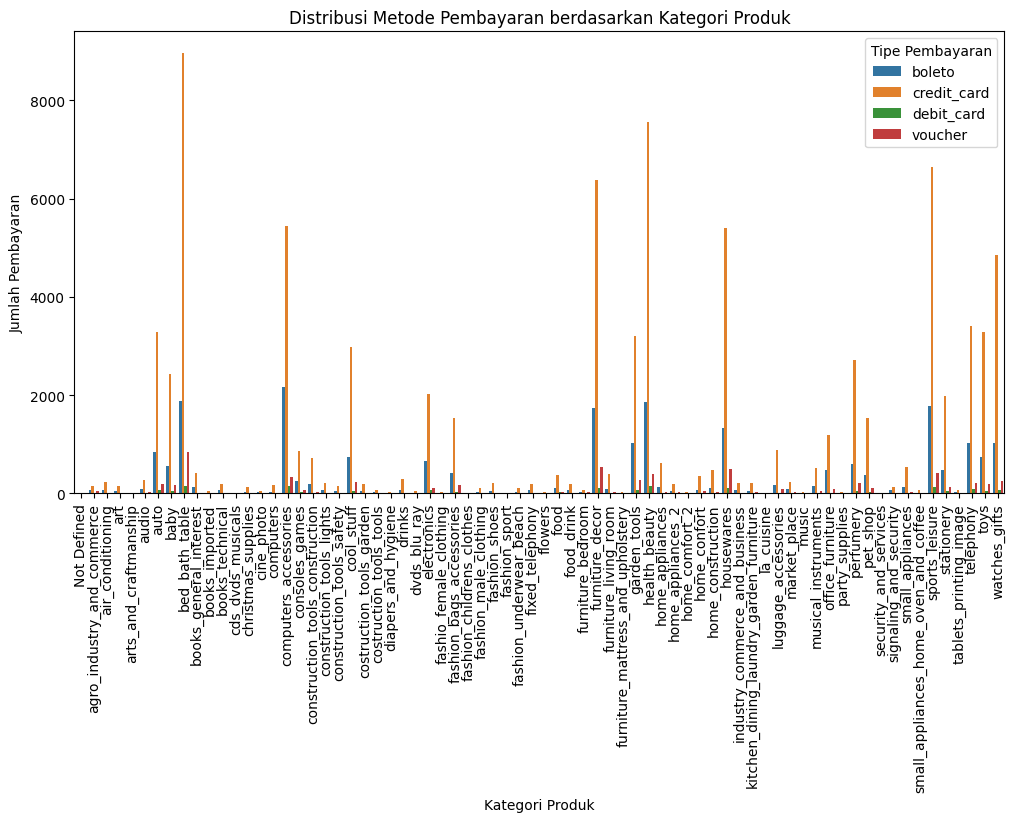

In [18]:
hitung_carabayar_perkategori = df_gabungan_kolom_penting.groupby(["product_category_name_english", "payment_type"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.barplot(data=hitung_carabayar_perkategori, x="product_category_name_english", y="count", hue="payment_type")
plt.xticks(rotation=90)
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembayaran")
plt.title("Distribusi Metode Pembayaran berdasarkan Kategori Produk")
plt.legend(title="Tipe Pembayaran")
plt.show()

**Insight:**
- Pada proses Explanatory, dilakukan describe pda dataframe untuk memperhatikan nilai yang ada, sehingga membantu dalam menentukan data yang diperlukan
- Dilakukan juga mengambil kolom tertentu setelah mendapat insight dari describe dataframe yang belum disortir kolomnya, kedalam dataframe yang baru
- Dilakukan pemantauan jumlah total distribusi transaksi berdasarkan metode pembayaran secara keseluruhan
- Terkahir melihat distribusi Metode Pembayaran pada setiap Kategori Produk

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Menampilkan Distribusi Jumlah Pembayaran Berdasarkan Metode yang digunakan menggunakan boxplot

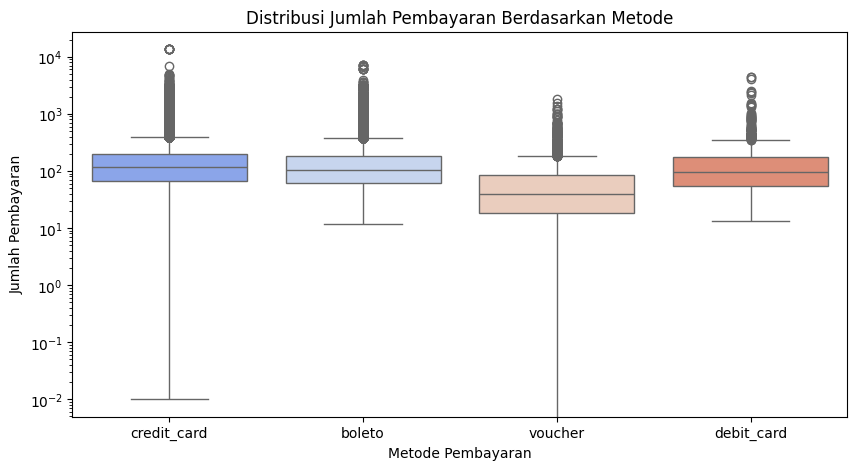

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gabungan_kolom_penting, x="payment_type", y="payment_value", hue="payment_type", palette="coolwarm", legend=False)
plt.yscale("log")  # Gunakan log scale agar lebih terbaca jika ada outlier besar
plt.title("Distribusi Jumlah Pembayaran Berdasarkan Metode")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Pembayaran")
plt.show()

### Pertanyaan 2:

Menampilkan Distribusi 5 Kategori Produk dengan Transaksi Terbanyak berdasarkan Metode Pembayaran serta 1 dari 5 kategori produk dengan total jumlah transaksi terbanyak menggunakan library seaborn

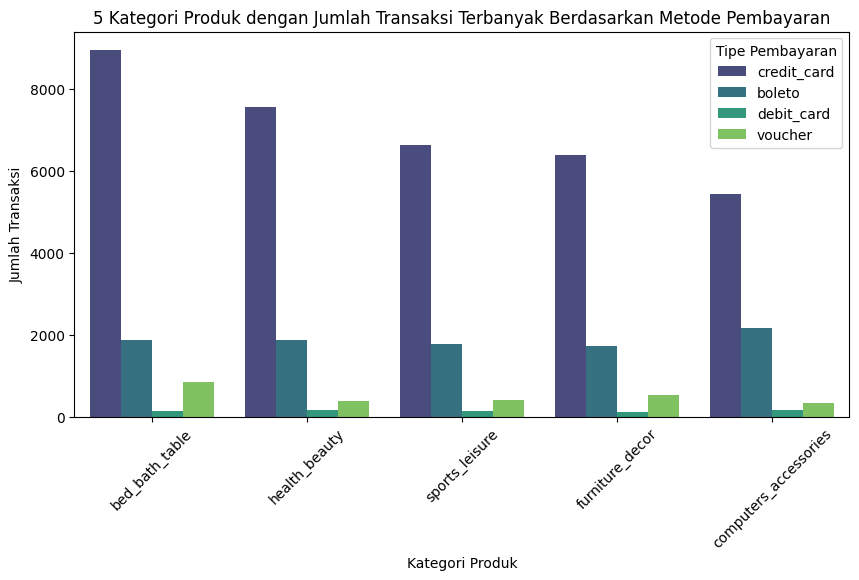

<ipython-input-32-c7c1a9b17129>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_categories, x="product_category_name_english", palette=warna, hue=None, legend=False, order=top_categories)


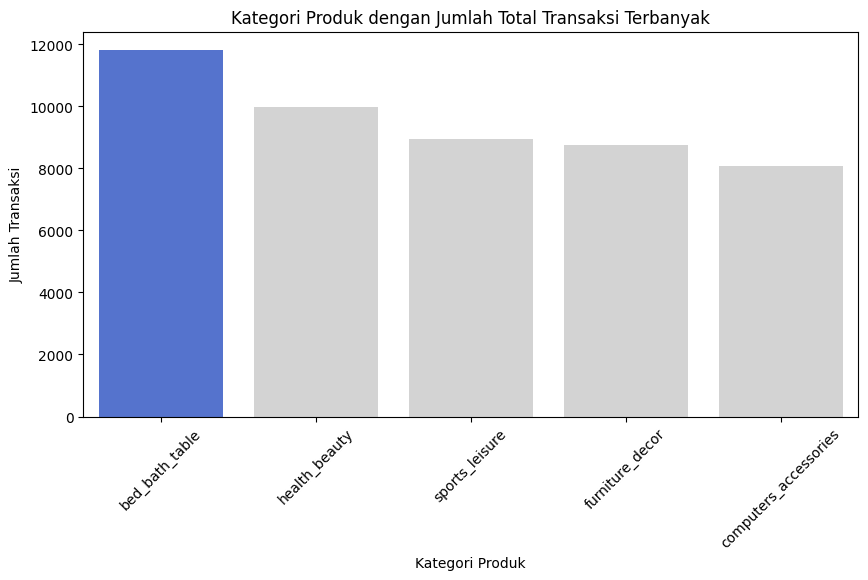

In [32]:
top_categories = df_gabungan_kolom_penting["product_category_name_english"].value_counts().nlargest(5).index
df_top_categories = df_gabungan_kolom_penting[df_gabungan_kolom_penting["product_category_name_english"].isin(top_categories)]


plt.figure(figsize=(10, 5))
sns.countplot(data=df_top_categories, x="product_category_name_english", palette="viridis", hue="payment_type", order=top_categories)
plt.title("5 Kategori Produk dengan Jumlah Transaksi Terbanyak Berdasarkan Metode Pembayaran")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Transaksi")
plt.legend(title="Tipe Pembayaran")
plt.xticks(rotation=45)
plt.show()


warna = ['royalblue'] + ['lightgrey'] * (len(top_categories) - 1)

plt.figure(figsize=(10, 5))
sns.countplot(data=df_top_categories, x="product_category_name_english", palette=warna, hue=None, legend=False, order=top_categories)
plt.title("Kategori Produk dengan Jumlah Total Transaksi Terbanyak")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Pada grafik untuk pertanyaan pertama, dapat terlihat distribusi dari jumlah pembayaran berdasarkan metode yang digunakan menggunakan boxplot. Metode visualisasi ini cocok digunakan karena dapat merepresentasikan nilai tertinggi dan terendah sekaligus
- Pada grafik untuk pertanyaan kedua, menampilkan 5 kategori produk yang memiliki jumlah transaksi terbanyak sekaligus distribusi pad setiap metode pembayarannya. Di diagram kedua juga menampilkan nilai pesan bahwa produk kategori 'bed_bath_table' adalah yang paling banyak jumlah total transaksinya.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

Kesimpulannya yang pertama semua metode pembayaran memiliki distribusi yang mirip, median jumlah pembayaran relatif sama untuk semua metode. Yang kedua, banyak transaksi dengan jumlah yang sangat besar (outliers) yang berarti ada beberapa pembayaran dalam jumlah sangat besar. Ketiga, metode pembayaran yang paling dominan digunakan di kategori produk dengan jumlah transaksi terbanyak adalah credit_card, terlihat dari dominasi nilai parameternya.

Metode boxplot ini sangat membantu karena mereprensentasikan banyak nilai sekaligus, seperti median, rentang interkuartil (IQR), outlier, simetri, dan variabilitas data. Sehingga hubungan distribusi antara metode pembayaran dengan jumlah pembayaran dapat disimpulkan dengan lebih mudah.

- Conclution pertanyaan 2

Dari grafik yang ditampilkan, terlihat bahwa para customer cenderung menggunakan credit_card sebagai metode pembayaran. Selain itu terlihat juga perbandingan jumlah transaksi dari 5 kategori produk yang paling banyak jumlah transaksinya. 'bed_bath_table' merupakan kategori produk yang memiliki jumlah transaksi terbanyak.

In [35]:
df_gabungan_kolom_penting.to_csv("all_data.csv", index=False)